# APPLICATION OF MACHINE LEARNING IN BIOLOGICAL SYSTEMS (ES60011) PROJECT 5

### 22CS30027
### Golla Meghanandh Manvith Prabhash

To classify unlabelled tumor images as Benign or Malignant.

#### 1. Importing required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

2024-11-07 20:36:47.284956: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-07 20:36:47.285463: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-07 20:36:47.288183: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-07 20:36:47.294797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730992007.306178   43039 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730992007.30

#### 2. Loading Train and Validation Data Set

In [2]:
# Set up image augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.3,
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define training and validation sets
training_set = train_datagen.flow_from_directory(
    "Dataset2/Dataset2/FNA",
    target_size=(50, 50),
    batch_size=40,
    class_mode='binary',
    subset='training'
)

validation_set = train_datagen.flow_from_directory(
    "Dataset2/Dataset2/FNA",
    target_size=(50, 50),
    batch_size=40,
    class_mode='binary',
    subset='validation'
)

Found 1380 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


#### 3. Initialise CNN

In [3]:
# Initialize a deeper CNN model
classifier = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), input_shape=(50, 50, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    # Fourth Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    # Global Average Pooling to reduce the number of parameters
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(128, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

/home/prabhas-golla/Desktop/ApplicationofML/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-07 20:36:48.332811: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


#### 4. Run CNN

In [4]:
# Compile the model
classifier.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and record training history
history = classifier.fit(
    training_set,
    validation_data=validation_set,
    epochs=20,
    verbose=1
)

Epoch 1/20


/home/prabhas-golla/Desktop/ApplicationofML/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8164 - loss: 0.4471 - val_accuracy: 0.3779 - val_loss: 0.9044
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8959 - loss: 0.2906 - val_accuracy: 0.3779 - val_loss: 1.1619
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8960 - loss: 0.3087 - val_accuracy: 0.3779 - val_loss: 1.4278
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9171 - loss: 0.2561 - val_accuracy: 0.3779 - val_loss: 1.8001
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9006 - loss: 0.2826 - val_accuracy: 0.3779 - val_loss: 1.8992
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8980 - loss: 0.2897 - val_accuracy: 0.3779 - val_loss: 1.9218
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9087 - loss: 0.2639 - val_accuracy: 0.3779 - val_loss: 2.1138
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9093 - loss: 0.2487 - val_accuracy: 0.3779 - val_loss: 2.

#### 5. Plot Analysis Graphs

##### 5.1 Train and Validation Accuracy

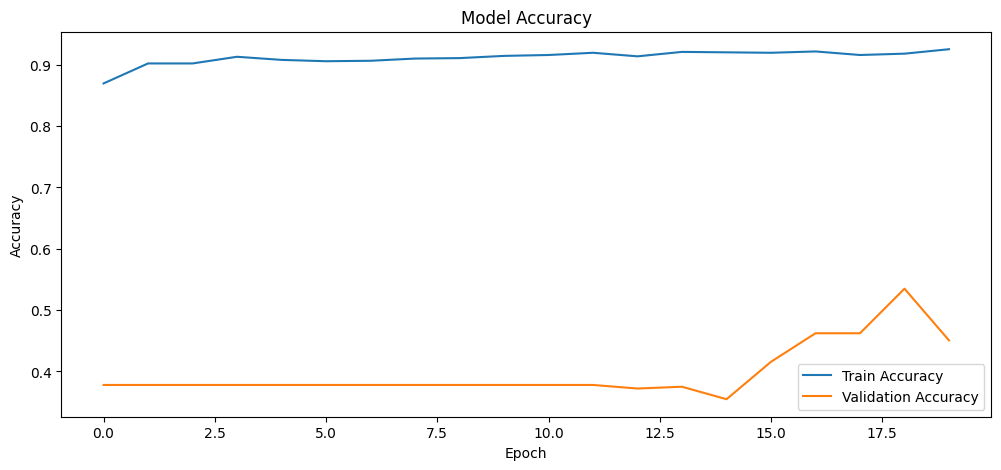

In [5]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

##### 5.2 Train and Validation Loss

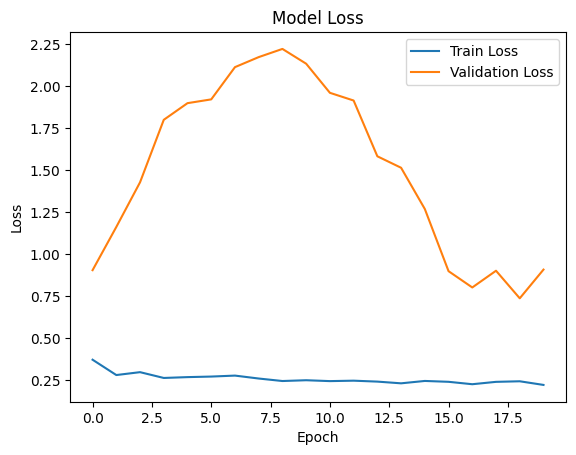

In [6]:
# Plot training and validation accuracy and loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 6. Load And Run Model on Test Data

In [7]:
# Function to load and preprocess test images
def load_test_images(folder, target_size=(50, 50)):
    images, image_names = [], []
    for filename in os.listdir(folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            img = load_img(os.path.join(folder, filename), target_size=target_size)
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            image_names.append(filename)
    return np.array(images), image_names

In [8]:
# Get true labels for the training set
true_labels_train = training_set.classes

# Predict classes on the training set
pred_train = classifier.predict(training_set, steps=len(training_set), verbose=1)
predictions_train = np.round(pred_train).astype(int)  # Round to get class predictions (0 or 1)

# Load and preprocess test images
test_folder = './Dataset2/Dataset2/test'
test_images, test_names = load_test_images(test_folder)

# Predict classes for test images
pred = classifier.predict(test_images, verbose=1)
predicted_classes = np.round(pred).astype(int)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


In [9]:
# Create DataFrame with predictions
results_df = pd.DataFrame({"File": test_names, "Probability": pred[:, 0], "Class": ["Malignant" if c else "Benign" for c in predicted_classes.flatten()]})
print(results_df)

            File  Probability      Class
0   thirteen.png     0.996667  Malignant
1       five.png     0.220268     Benign
2      eight.png     0.995423  Malignant
3        one.png     0.268211     Benign
4        ten.png     0.762959  Malignant
5   fourteen.png     0.996673  Malignant
6     eleven.png     0.996687  Malignant
7        two.png     0.256295     Benign
8       nine.png     0.957182  Malignant
9       four.png     0.980695  Malignant
10     three.png     0.976886  Malignant
11       six.png     0.019875     Benign
12     seven.png     0.795081  Malignant
13    twelve.png     0.133298     Benign


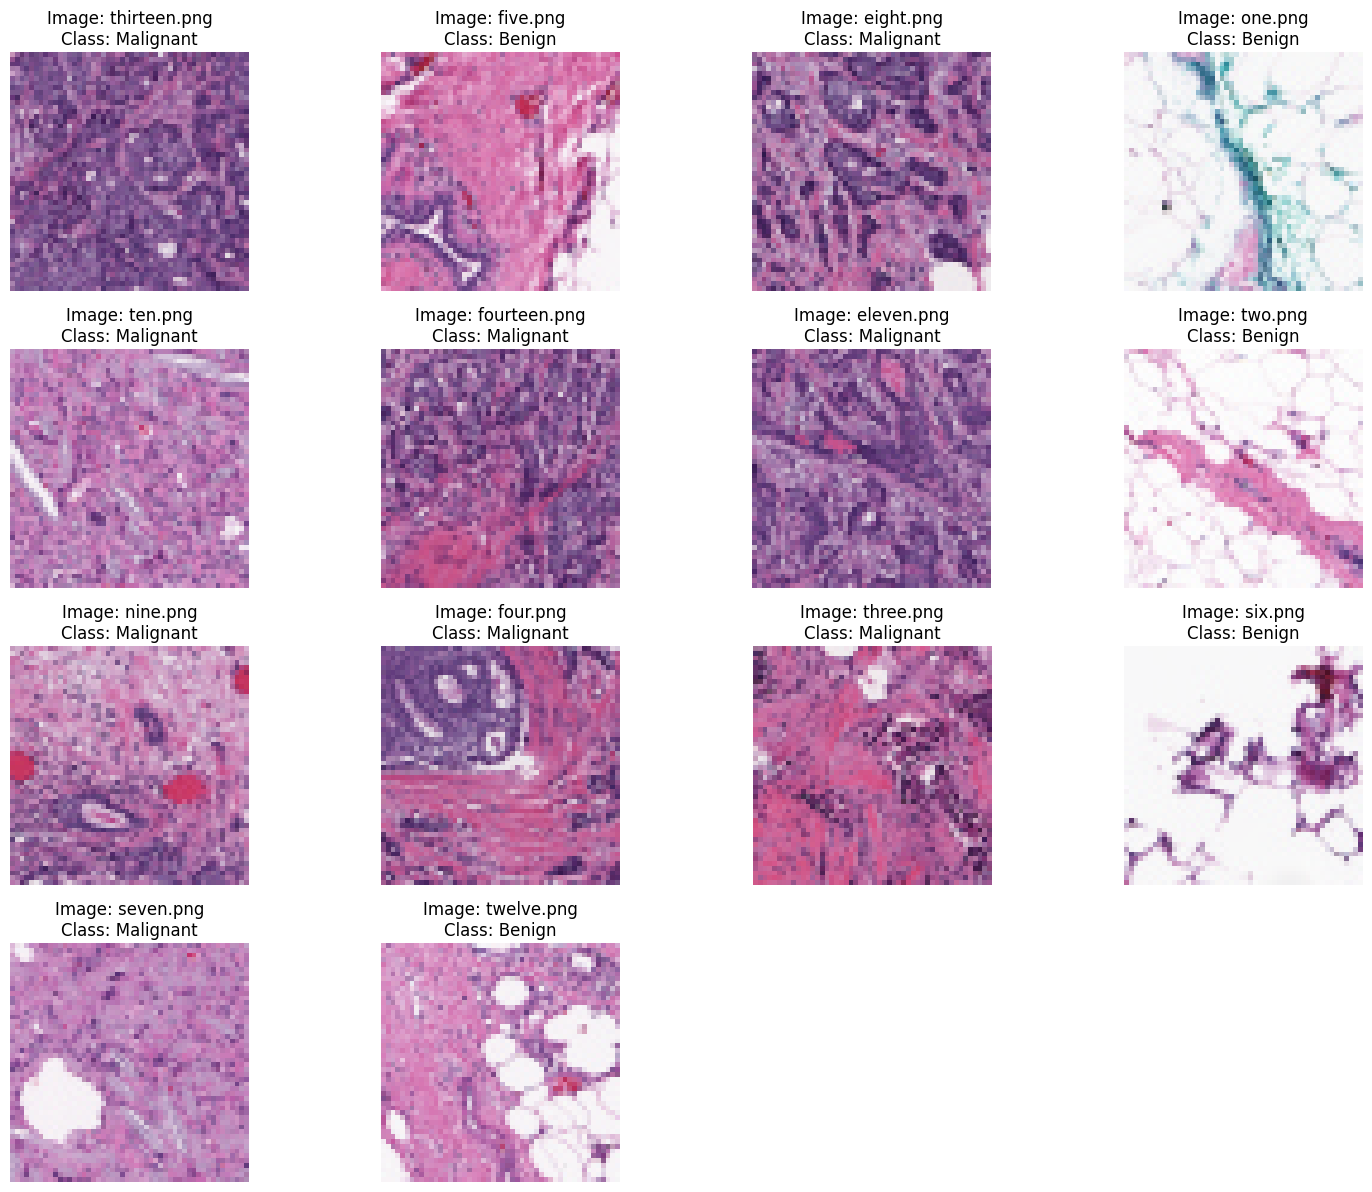

In [10]:
plt.figure(figsize=(15, 15))
for i, file_name in enumerate(test_names[:25]):  # Display first 25 images or less
    img = load_img(os.path.join(test_folder, file_name), target_size=(50, 50))
    plt.subplot(5, 4, i + 1)  # 5 rows, 4 columns
    plt.imshow(img)
    label = "Malignant" if predicted_classes[i] == 1 else "Benign"
    plt.title(f"Image: {file_name}\nClass: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()